# TITANIC PROJECT

This project is based on the Titanic dataset given on Kaggle. 

It’s a legendary titanic machine learning dataset.
Moreover, the competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The Titanic Challenge:

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, the widely considered “unsinkable” Titanic sank after colliding with an iceberg. 

Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

Goal: Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data like age, gender, class, etc.

Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

About the columns:
1. PassengerId: The unique identification number given to each passenger onboard the ship for security and checking purpose.
2. Survived: This column indicates whether the passenger has survived or not. 0 means not survived and 1 means survived. So, we understand that this is a BINARY CLASSIFICATION PROBLEM as, there are only 2 possible outcomes and we need to predict it.
3. Pclass: The class the particlar passenger were travelling in. 1 is first class, 2 is second class and 3 is third class.
4. Name
5. Sex: Gender of the passenger
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
import numpy as np
df['Age']=df['Age'].fillna(np.mean(df['Age']))

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

EDA

<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>

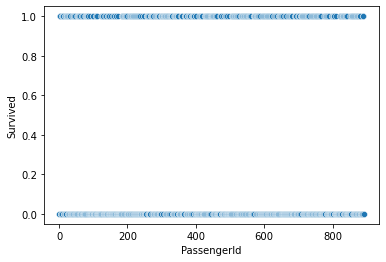

In [7]:
import seaborn as sns
sns.scatterplot(x='PassengerId',y='Survived',data=df)

Each passenger has a unique ID so, we get an even scatter plot.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

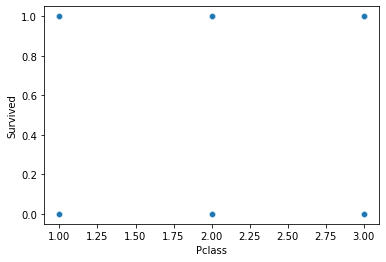

In [8]:
sns.scatterplot(x='Pclass',y='Survived',data=df)

There are 3 classes in the ship, so we get an evem scatterplot.

<AxesSubplot:xlabel='Age', ylabel='Survived'>

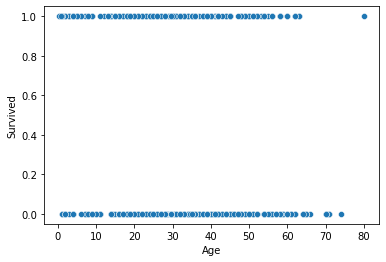

In [9]:
sns.scatterplot(x='Age',y='Survived',data=df)

We see that the data is mainly spread over the range of 1 to 68 years.

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

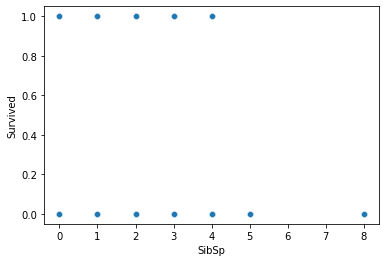

In [10]:
sns.scatterplot(x='SibSp',y='Survived',data=df)

We see that the data is mainly spread over the range of 0 to 5.

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

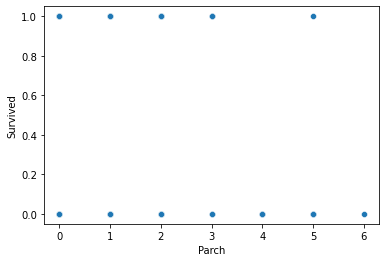

In [11]:
sns.scatterplot(x='Parch',y='Survived',data=df)

We see that the data is mainly spreadover the range of 0 to 5.

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

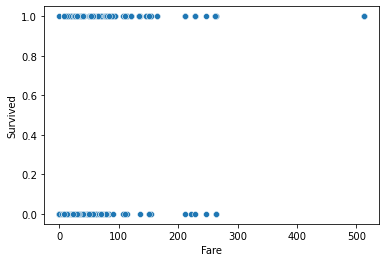

In [12]:
sns.scatterplot(x='Fare',y='Survived',data=df)

We see that the data is spread over the range of 0 to 250.

<AxesSubplot:xlabel='Survived', ylabel='count'>

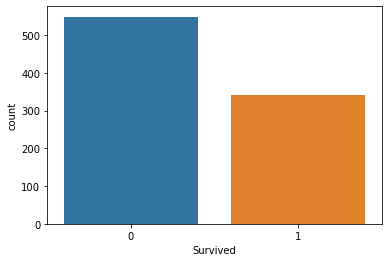

In [13]:
sns.countplot(x='Survived',data=df)

In [14]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [15]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [16]:
df

PassengerId  Survived  Pclass   Name  Sex        Age  SibSp  Parch  \
0              1         0       3  108.0  1.0  22.000000      1      0   
1              2         1       1  190.0  0.0  38.000000      1      0   
2              3         1       3  353.0  0.0  26.000000      0      0   
3              4         1       1  272.0  0.0  35.000000      1      0   
4              5         0       3   15.0  1.0  35.000000      0      0   
..           ...       ...     ...    ...  ...        ...    ...    ...   
886          887         0       2  548.0  1.0  27.000000      0      0   
887          888         1       1  303.0  0.0  19.000000      0      0   
888          889         0       3  413.0  0.0  29.699118      1      2   
889          890         1       1   81.0  1.0  26.000000      0      0   
890          891         0       3  220.0  1.0  32.000000      0      0   

     Ticket     Fare  Cabin  Embarked  
0     523.0   7.2500    NaN       2.0  
1     596.0  71.2833   81.0       0.0  
2     669.0   7.9250    NaN       2.0  
3      49.0  53.1000   55.0       2.0  
4     472.0   8.0500    NaN       2.0  
..      ...      ...    ...       ...  
886   101.0  13.0000    NaN       2.0  
887    14.0  30.0000   30.0       2.0  
888   675.0  23.4500    NaN       2.0  
889     8.0  30.0000   60.0       0.0  
890   466.0   7.7500    NaN       1.0  

[891 rows x 12 columns]

In [17]:
df1=df.drop(['Name','PassengerId','Ticket'],axis=1)
df1

Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked
0           0       3  1.0  22.000000      1      0   7.2500    NaN       2.0
1           1       1  0.0  38.000000      1      0  71.2833   81.0       0.0
2           1       3  0.0  26.000000      0      0   7.9250    NaN       2.0
3           1       1  0.0  35.000000      1      0  53.1000   55.0       2.0
4           0       3  1.0  35.000000      0      0   8.0500    NaN       2.0
..        ...     ...  ...        ...    ...    ...      ...    ...       ...
886         0       2  1.0  27.000000      0      0  13.0000    NaN       2.0
887         1       1  0.0  19.000000      0      0  30.0000   30.0       2.0
888         0       3  0.0  29.699118      1      2  23.4500    NaN       2.0
889         1       1  1.0  26.000000      0      0  30.0000   60.0       0.0
890         0       3  1.0  32.000000      0      0   7.7500    NaN       1.0

[891 rows x 9 columns]

We drop the Name, Ticket and PassengerId column as it is filled with a huge amount of varied data which is unique to every passenger that can hamper our model performance.

Correlation-

In [18]:
df1.corr()

Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481 -0.543351 -0.069809 -0.035322  0.081629   
Pclass   -0.338481  1.000000  0.131900 -0.331339  0.083081  0.018443   
Sex      -0.543351  0.131900  1.000000  0.084153 -0.114631 -0.245489   
Age      -0.069809 -0.331339  0.084153  1.000000 -0.232625 -0.179191   
SibSp    -0.035322  0.083081 -0.114631 -0.232625  1.000000  0.414838   
Parch     0.081629  0.018443 -0.245489 -0.179191  0.414838  1.000000   
Fare      0.257307 -0.549500 -0.182333  0.091566  0.159651  0.216225   
Cabin     0.029619  0.493209 -0.070130 -0.136648  0.066025  0.009587   
Embarked -0.169718  0.164681  0.110320 -0.028927  0.068900  0.040449   

              Fare     Cabin  Embarked  
Survived  0.257307  0.029619 -0.169718  
Pclass   -0.549500  0.493209  0.164681  
Sex      -0.182333 -0.070130  0.110320  
Age       0.091566 -0.136648 -0.028927  
SibSp     0.159651  0.066025  0.068900  
Parch     0.216225  0.009587  0.040449  
Fare      1.000000 -0.259622 -0.226311  
Cabin    -0.259622  1.000000  0.230792  
Embarked -0.226311  0.230792  1.000000

Correlation using heatmap-

<AxesSubplot:>

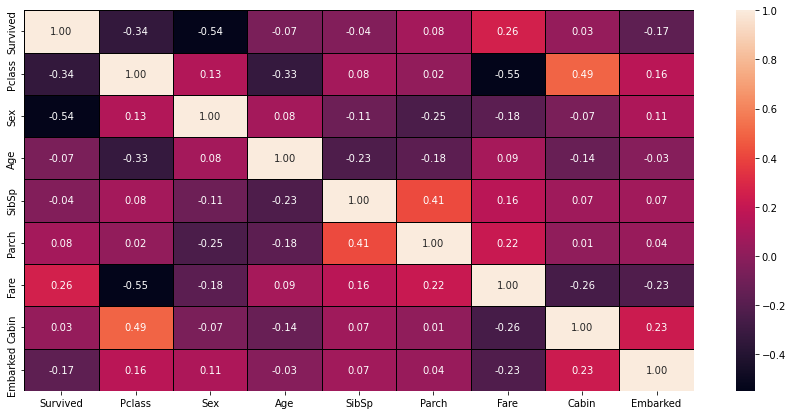

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

Outcome of Correlation- 

We see that some data is positively correlated with the target data- Survived, while some are negatively correlated to it.

Correlation with the target column- Survived are as follows-

Pclass -0.34%

Sex -0.54

Age -0.07

SibSp -0.04

Parch 0.08

Fare 0.26

Cabin 0.03

Embarked -0.17

Max correlation: Fare ; Min correlation: SibSp

Describing Datasets-

In [20]:
df1.describe()

Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587   29.699118    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.002015    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   29.699118    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare       Cabin    Embarked  
count  891.000000  204.000000  889.000000  
mean    32.204208   76.000000    1.535433  
std     49.693429   42.233225    0.792088  
min      0.000000    0.000000    0.000000  
25%      7.910400   40.000000    1.000000  
50%     14.454200   75.000000    2.000000  
75%     31.000000  113.250000    2.000000  
max    512.329200  146.000000    2.000000

THE MEAN IS GREATER THAN MEDIAN HERE, SO THE DATA IS RIGHT SKEWED

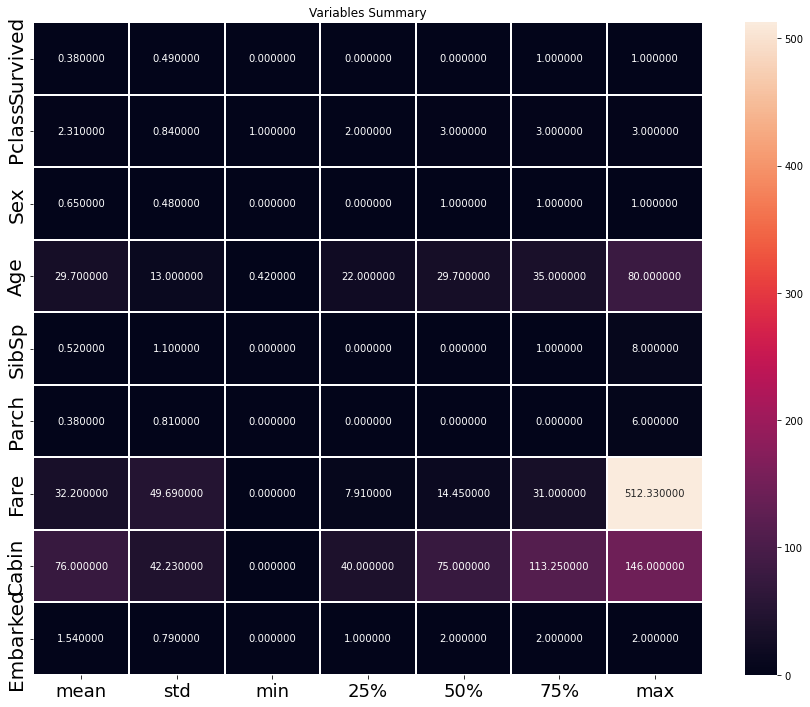

In [21]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df1.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.title('Variables Summary')
plt.show()

In [22]:
df1.shape

(891, 9)

Outcome of describing of datasets-
From the above plotting we are determining mean, standard deviation, ,minimum and maximum value of each column. It helps us further in data cleaning:
Total number of rows in datasets- 891
Total number of columns in datasets- 9

1. Survived- it is binary classification data

Mean- 0.38

std- 0.49

Max- 1

Min- 0

2. Pclass

Mean- 2.31

std- 0.84

Max- 1

Min- 3

3. Sex

Mean- 0.65

std- 0.48

Max- 1

Min- 0

4. Age

Mean- 29.7

std- 0.48

Max- 80

Min- 0.42

5. SibSp

Mean- 0.52

std- 1.1

Max- 8

Min- 0

6. Parch

Mean- 0.38

std- 0.81

Max- 6

Min- 0

7. Fare

Mean- 32.2

std- 49.6

Max- 512.33

Min- 0

8. Cabin

Mean- 76

std- 42.23

Max- 146

Min- 0

9. Embarked

Mean- 1.54

std- 0.79

Max- 2

Min- 0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    float64
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    float64
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    float64
 11  Embarked     889 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 83.7 KB


From the above code we can have the columns datatype and the memory used by the dataframe.

In [24]:
df['Survived'].unique()

array([0, 1])

In [25]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [26]:
df1['Cabin']=df1['Cabin'].fillna(np.mean(df1['Cabin']))
df1

Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked
0           0       3  1.0  22.000000      1      0   7.2500   76.0       2.0
1           1       1  0.0  38.000000      1      0  71.2833   81.0       0.0
2           1       3  0.0  26.000000      0      0   7.9250   76.0       2.0
3           1       1  0.0  35.000000      1      0  53.1000   55.0       2.0
4           0       3  1.0  35.000000      0      0   8.0500   76.0       2.0
..        ...     ...  ...        ...    ...    ...      ...    ...       ...
886         0       2  1.0  27.000000      0      0  13.0000   76.0       2.0
887         1       1  0.0  19.000000      0      0  30.0000   30.0       2.0
888         0       3  0.0  29.699118      1      2  23.4500   76.0       2.0
889         1       1  1.0  26.000000      0      0  30.0000   60.0       0.0
890         0       3  1.0  32.000000      0      0   7.7500   76.0       1.0

[891 rows x 9 columns]

In [27]:
df1['Embarked']=df1['Embarked'].fillna(np.mean(df1['Embarked']))
df1

Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked
0           0       3  1.0  22.000000      1      0   7.2500   76.0       2.0
1           1       1  0.0  38.000000      1      0  71.2833   81.0       0.0
2           1       3  0.0  26.000000      0      0   7.9250   76.0       2.0
3           1       1  0.0  35.000000      1      0  53.1000   55.0       2.0
4           0       3  1.0  35.000000      0      0   8.0500   76.0       2.0
..        ...     ...  ...        ...    ...    ...      ...    ...       ...
886         0       2  1.0  27.000000      0      0  13.0000   76.0       2.0
887         1       1  0.0  19.000000      0      0  30.0000   30.0       2.0
888         0       3  0.0  29.699118      1      2  23.4500   76.0       2.0
889         1       1  1.0  26.000000      0      0  30.0000   60.0       0.0
890         0       3  1.0  32.000000      0      0   7.7500   76.0       1.0

[891 rows x 9 columns]

In [28]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

We see that there are no null cells now in our dataset. Hence, we can go ahead with checking outliers and building our Binary Classification Model.

Checking outliers-

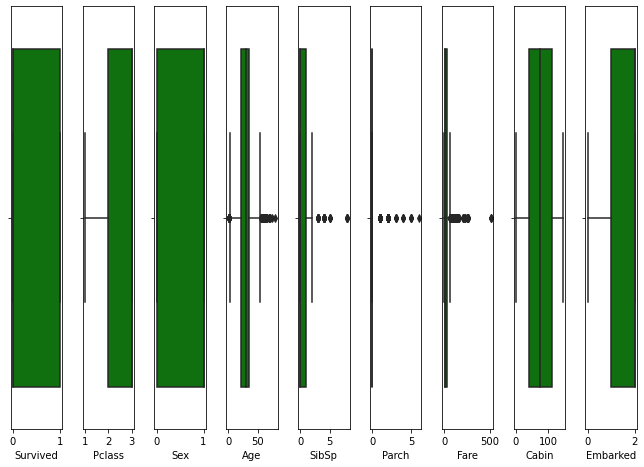

In [29]:
collist=df1.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Skewness-

In [30]:
df1.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Cabin       0.001155
Embarked   -1.262780
dtype: float64

Outcome of skewness: Skewness threshold is taken as +/-0.65.

Columns which are having skewness:

SibSp

Parch

Fare

Embarked

Normal Distribution Curve-

<AxesSubplot:xlabel='Survived', ylabel='Density'>

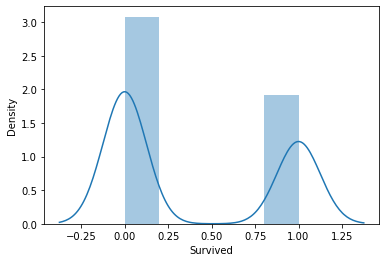

In [31]:
sns.distplot(df1['Survived'])

The data of the column is not normalised. The building blocks is out of the normalised curve.

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

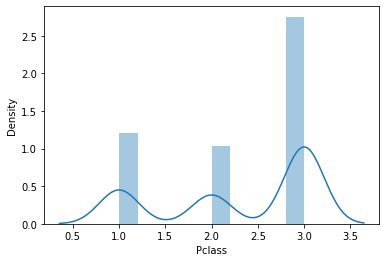

In [32]:
sns.distplot(df1['Pclass'])

The data of the column is not normalised. The building blocks is out of the normalised curve.

<AxesSubplot:xlabel='Sex', ylabel='Density'>

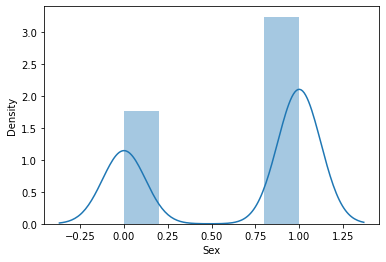

In [33]:
sns.distplot(df1['Sex'])

The data of the column is not normalised. The building blocks is out of the normalised curve.

<AxesSubplot:xlabel='Age', ylabel='Density'>

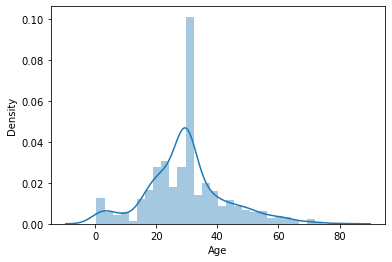

In [34]:
sns.distplot(df1['Age'])

The data of the column is not normalised. The building blocks is out of the normalised curve.

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

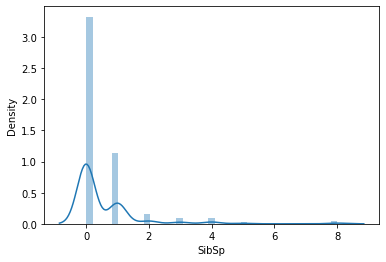

In [35]:
sns.distplot(df1['SibSp'])

The data of the column is not normalised. The building blocks is out of the normalised curve.

<AxesSubplot:xlabel='Parch', ylabel='Density'>

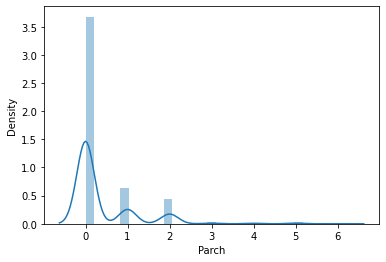

In [36]:
sns.distplot(df1['Parch'])

The data of the column is not normalised. The building blocks is out of the normalised curve.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

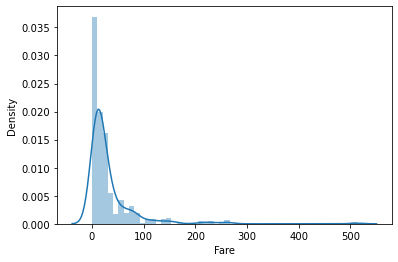

In [37]:
sns.distplot(df1['Fare'])

The data of the column is not normalised. The building blocks is out of the normalised curve.

<AxesSubplot:xlabel='Cabin', ylabel='Density'>

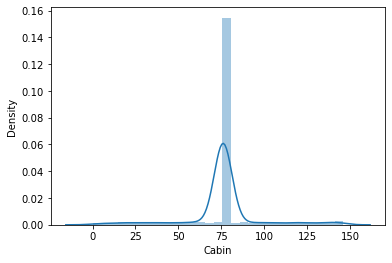

In [38]:
sns.distplot(df1['Cabin'])

The data of the column is not normalised. The building blocks is out of the normalised curve.

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

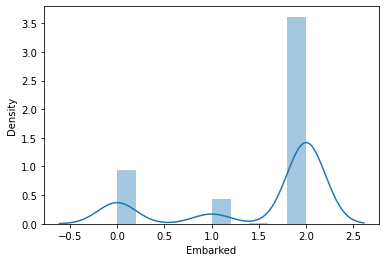

In [39]:
sns.distplot(df1['Embarked'])

The data of the column is not normalised. The building blocks is out of the normalised curve.

The normal distribution shows that the data is skewed.

Data Cleaning-

In [40]:
delete=pd.DataFrame([['-0.338481','Pclass','No','Alot'],['-0.543351','Sex','No','Alot'],['0.257307','Fare','No','Alot'],['-0.169718','Embarked','No','Alot']],columns=['Correlation with Target','Column Name','Normalised','Outliers'])
delete

Correlation with Target Column Name Normalised Outliers
0               -0.338481      Pclass         No     Alot
1               -0.543351         Sex         No     Alot
2                0.257307        Fare         No     Alot
3               -0.169718    Embarked         No     Alot

Here, we are setting threshold of correlation as +/-0.1. It is not standard, the dataset demands.

In [41]:
df_new=df1.drop(['Pclass','Sex','Fare','Embarked'],axis=1)
df_new

Survived        Age  SibSp  Parch  Cabin
0           0  22.000000      1      0   76.0
1           1  38.000000      1      0   81.0
2           1  26.000000      0      0   76.0
3           1  35.000000      1      0   55.0
4           0  35.000000      0      0   76.0
..        ...        ...    ...    ...    ...
886         0  27.000000      0      0   76.0
887         1  19.000000      0      0   30.0
888         0  29.699118      1      2   76.0
889         1  26.000000      0      0   60.0
890         0  32.000000      0      0   76.0

[891 rows x 5 columns]

In [42]:
df_new.shape

(891, 5)

Dividing data in features and vectors:

Removing outliers-

Z-score Technique:

In [43]:
x=df_new.iloc[:,1:]
y=df_new.iloc[:,0]

x is independent variable and y is target variable.

In [44]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
z.shape

(891, 4)

In [45]:
threshold=3
print(np.where(z>3))

(array([ 10,  13,  16,  23,  25,  50,  59,  66,  68,  71,  75,  86,  96,
        96, 116, 119, 128, 148, 159, 164, 167, 171, 174, 180, 182, 183,
       185, 193, 201, 205, 209, 233, 251, 261, 266, 278, 284, 324, 339,
       340, 345, 360, 386, 394, 437, 438, 445, 475, 480, 493, 516, 541,
       542, 556, 567, 583, 599, 610, 618, 630, 630, 638, 647, 672, 678,
       683, 686, 699, 715, 724, 736, 737, 745, 774, 776, 787, 792, 806,
       809, 813, 824, 846, 850, 851, 858, 863, 867, 885]), array([3, 2, 1, 3, 2, 1, 1, 3, 1, 1, 3, 2, 0, 3, 0, 1, 3, 3, 1, 1, 2, 1,
       3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 2, 1, 3,
       2, 2, 3, 3, 1, 0, 3, 1, 1, 3, 2, 3, 3, 2, 3, 0, 3, 2, 3, 0, 2, 1,
       1, 3, 3, 3, 2, 3, 0, 2, 3, 1, 1, 3, 3, 1, 1, 1, 1, 0, 2, 1, 3, 2]))


In [46]:
x=x[(z<3).all(axis=1)]
x.shape

(805, 4)

In [47]:
y=y[(z<3).all(axis=1)]
y.shape

(805,)

Percentage data loss-

In [48]:
loss_percent=(891-805)/891*100
print(loss_percent)

9.652076318742985


Checking whether how much outliers are still there. If the outliers there help in the testing of model or not.

Transforming data to remove skewness-

In [49]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [50]:
x

array([[-0.63291233,  1.55157541, -0.49025755, -0.01117539],
       [ 0.6955301 ,  1.55157541, -0.49025755,  0.3149629 ],
       [-0.29014011, -0.63210919, -0.49025755, -0.01117539],
       ...,
       [ 0.01984682,  1.55157541,  2.06537824, -0.01117539],
       [-0.29014011, -0.63210919, -0.49025755, -1.02309918],
       [ 0.20970232, -0.63210919, -0.49025755, -0.01117539]])

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.63291233,  1.55157541, -0.49025755, -0.01117539],
       [ 0.6955301 ,  1.55157541, -0.49025755,  0.3149629 ],
       [-0.29014011, -0.63210919, -0.49025755, -0.01117539],
       ...,
       [ 0.01984682,  1.55157541,  2.06537824, -0.01117539],
       [-0.29014011, -0.63210919, -0.49025755, -1.02309918],
       [ 0.20970232, -0.63210919, -0.49025755, -0.01117539]])

Oversampling the data-

In [52]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [53]:
y.value_counts()

0    490
1    490
Name: Survived, dtype: int64

CLASSIFICATION MODEL-

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

Splitting the dataframe-

In [55]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state: ',i)
        print('Training accuracy is:',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy is:',accuracy_score(y_test,pred_test)*100)

At random state 0 The model performs very well
At random state:  0
Training accuracy is: 61.224489795918366
Testing accuracy is: 61.224489795918366
At random state 6 The model performs very well
At random state:  6
Training accuracy is: 61.224489795918366
Testing accuracy is: 61.224489795918366
At random state 203 The model performs very well
At random state:  203
Training accuracy is: 61.224489795918366
Testing accuracy is: 61.224489795918366
At random state 323 The model performs very well
At random state:  323
Training accuracy is: 61.224489795918366
Testing accuracy is: 61.224489795918366
At random state 432 The model performs very well
At random state:  432
Training accuracy is: 61.224489795918366
Testing accuracy is: 61.224489795918366
At random state 475 The model performs very well
At random state:  475
Training accuracy is: 61.224489795918366
Testing accuracy is: 61.224489795918366
At random state 500 The model performs very well
At random state:  500
Training accuracy is: 61.

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=899)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.50      0.65      0.57        92
           1       0.58      0.43      0.50       104

    accuracy                           0.54       196
   macro avg       0.54      0.54      0.53       196
weighted avg       0.55      0.54      0.53       196



Cross validation score-

In [58]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv:',j)
    print('Cross validation score is',lsc*100)
    print('Accuracy score is',lss*100)
    print('\n')

At cv: 2
Cross validation score is 60.61224489795918
Accuracy score is 60.204081632653065


At cv: 3
Cross validation score is 60.10174918544367
Accuracy score is 60.204081632653065


At cv: 4
Cross validation score is 59.59183673469387
Accuracy score is 60.204081632653065


At cv: 5
Cross validation score is 59.897959183673464
Accuracy score is 60.204081632653065


At cv: 6
Cross validation score is 59.497979949124634
Accuracy score is 60.204081632653065


At cv: 7
Cross validation score is 60.30612244897959
Accuracy score is 60.204081632653065


At cv: 8
Cross validation score is 60.416666666666664
Accuracy score is 60.204081632653065


At cv: 9
Cross validation score is 60.20500622947106
Accuracy score is 60.204081632653065




Since cross validation score and accuracy score are almost the same, we go ahead with the good approach.

In [59]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print('The cv score is',lsscore_selected,'\n The accuracy score is',lss)

The cv score is 0.5989795918367347 
 The accuracy score is 0.6020408163265306


In [60]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.6836734693877551
[[65 27]
 [35 69]]
              precision    recall  f1-score   support

           0       0.65      0.71      0.68        92
           1       0.72      0.66      0.69       104

    accuracy                           0.68       196
   macro avg       0.68      0.68      0.68       196
weighted avg       0.69      0.68      0.68       196



In [61]:
score=cross_val_score(RFC,x,y,cv=4)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is: ',accuracy_score(y_test,predRFC)-score.mean())

[0.64897959 0.64897959 0.68571429 0.68163265]
0.6663265306122449
Difference between Accuracy score and cross validation score is:  0.01734693877551019


In [62]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6224489795918368
[[74 18]
 [56 48]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67        92
           1       0.73      0.46      0.56       104

    accuracy                           0.62       196
   macro avg       0.65      0.63      0.62       196
weighted avg       0.65      0.62      0.61       196



Checking cv score for Support vector machine classifier-

In [63]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is: ',accuracy_score(y_test,predsvc)-score.mean())

[0.57653061 0.66326531 0.66326531 0.66326531 0.65306122]
0.6438775510204081
Difference between Accuracy score and cross validation score is:  -0.021428571428571352


Checking accuracy score for Gradient Boosting Classifier-

In [64]:
GB= GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.6632653061224489
[[71 21]
 [45 59]]
              precision    recall  f1-score   support

           0       0.61      0.77      0.68        92
           1       0.74      0.57      0.64       104

    accuracy                           0.66       196
   macro avg       0.67      0.67      0.66       196
weighted avg       0.68      0.66      0.66       196



Checking cv score for Gradient Boosting Classifier-

In [65]:
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is: ',accuracy_score(y_test,predGB)-score.mean())

[0.62755102 0.66326531 0.67857143 0.69387755 0.67857143]
0.6683673469387756
Difference between Accuracy score and cross validation score is:  -0.005102040816326703


We see that RFC is the best model here because it has the least difference between Accuracy score and Cross Validation Score which is 0.01734693877551019.

Hyper parameter tuning-

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid={'n_estimators': [200,500],
           'max_features': ['auto','sqrt','log2'],
           'max_depth': [4,5,6,7,8],
           'criterion': ['gini','entropy']}

In [68]:
grid=GridSearchCV(RFC,param_grid,cv=4)

In [69]:
grid.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [70]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}


In [71]:
print(grid.best_estimator_)

RandomForestClassifier(max_depth=4, max_features='auto', n_estimators=500)


In [72]:
grid_predictions=grid.predict(x_test)
grid_predictions

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [73]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.62      0.78      0.69        92
           1       0.75      0.57      0.64       104

    accuracy                           0.67       196
   macro avg       0.68      0.67      0.67       196
weighted avg       0.69      0.67      0.67       196



Accuracy score is 67%.

AUC ROC CURVE-

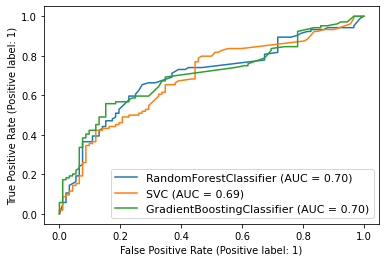

In [74]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(RFC,x_test,y_test)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(GB,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

Model Saving-

In [75]:
import pickle
filename='inhouse_titanic.pk1'
pickle.dump(lr,open(filename,'wb'))

Conclusion-

In [76]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_com

original  predicted
0           1          1
1           0          1
2           1          0
3           1          0
4           1          1
..        ...        ...
191         1          1
192         0          0
193         0          1
194         1          1
195         1          0

[196 rows x 2 columns]

We can visualize that there is some error in the outcome using the above model.

THE END